In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_chroma_stft.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_chroma_stft.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_chroma_stft.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_chroma_stft.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test)

In [6]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0], 1, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=128,activation='relu',
         return_sequences=True,
         input_shape=(1,1)
     ),
     tf.keras.layers.LSTM(
         units=64,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=32,
         activation='relu'
     ),

     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_chroma_stft=model.fit(X_train, y_train, batch_size=64, epochs=120, validation_data=(X_test, y_test))

Train...
Epoch 1/120
71/71 [==============================] - 13s 40ms/step - loss: 2.2572 - accuracy: 0.1918 - val_loss: 2.1732 - val_accuracy: 0.1531
Epoch 2/120
71/71 [==============================] - 1s 16ms/step - loss: 2.0560 - accuracy: 0.2152 - val_loss: 2.0909 - val_accuracy: 0.1708
Epoch 3/120
71/71 [==============================] - 1s 18ms/step - loss: 1.9912 - accuracy: 0.2314 - val_loss: 2.0667 - val_accuracy: 0.1840
Epoch 4/120
71/71 [==============================] - 1s 20ms/step - loss: 1.9679 - accuracy: 0.2367 - val_loss: 2.0592 - val_accuracy: 0.1932
Epoch 5/120
71/71 [==============================] - 1s 20ms/step - loss: 1.9576 - accuracy: 0.2412 - val_loss: 2.0567 - val_accuracy: 0.2015
Epoch 6/120
71/71 [==============================] - 1s 21ms/step - loss: 1.9517 - accuracy: 0.2469 - val_loss: 2.0667 - val_accuracy: 0.1928
Epoch 7/120
71/71 [==============================] - 1s 15ms/step - loss: 1.9499 - accuracy: 0.2474 - val_loss: 2.0598 - val_accuracy: 0.1

71/71 [==============================] - 1s 14ms/step - loss: 1.9320 - accuracy: 0.2501 - val_loss: 2.0636 - val_accuracy: 0.2003
Epoch 59/120
71/71 [==============================] - 1s 16ms/step - loss: 1.9303 - accuracy: 0.2503 - val_loss: 2.0671 - val_accuracy: 0.2025
Epoch 60/120
71/71 [==============================] - 1s 14ms/step - loss: 1.9313 - accuracy: 0.2521 - val_loss: 2.0676 - val_accuracy: 0.1921
Epoch 61/120
71/71 [==============================] - 1s 17ms/step - loss: 1.9307 - accuracy: 0.2456 - val_loss: 2.0652 - val_accuracy: 0.2095
Epoch 62/120
71/71 [==============================] - 1s 21ms/step - loss: 1.9306 - accuracy: 0.2469 - val_loss: 2.0623 - val_accuracy: 0.2074
Epoch 63/120
71/71 [==============================] - 1s 17ms/step - loss: 1.9325 - accuracy: 0.2472 - val_loss: 2.0619 - val_accuracy: 0.1949
Epoch 64/120
71/71 [==============================] - 1s 17ms/step - loss: 1.9301 - accuracy: 0.2545 - val_loss: 2.0643 - val_accuracy: 0.2077
Epoch 65/120

71/71 [==============================] - 1s 16ms/step - loss: 1.9252 - accuracy: 0.2503 - val_loss: 2.0738 - val_accuracy: 0.1902
Epoch 116/120
71/71 [==============================] - 1s 16ms/step - loss: 1.9249 - accuracy: 0.2538 - val_loss: 2.0824 - val_accuracy: 0.1906
Epoch 117/120
71/71 [==============================] - 1s 15ms/step - loss: 1.9242 - accuracy: 0.2474 - val_loss: 2.0748 - val_accuracy: 0.1928
Epoch 118/120
71/71 [==============================] - 1s 16ms/step - loss: 1.9242 - accuracy: 0.2505 - val_loss: 2.0831 - val_accuracy: 0.1871
Epoch 119/120
71/71 [==============================] - 1s 16ms/step - loss: 1.9246 - accuracy: 0.2538 - val_loss: 2.0731 - val_accuracy: 0.1996
Epoch 120/120
71/71 [==============================] - 1s 15ms/step - loss: 1.9232 - accuracy: 0.2574 - val_loss: 2.0749 - val_accuracy: 0.1916


In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 3s 5ms/step - loss: 2.0749 - accuracy: 0.1916
Pre-training accuracy: 19.1590%


In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.25761279463768005
Testing Accuracy:  0.19158989191055298


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.19158989191055298


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[9 5 4 ... 3 3 3]


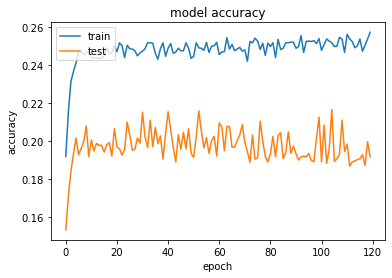

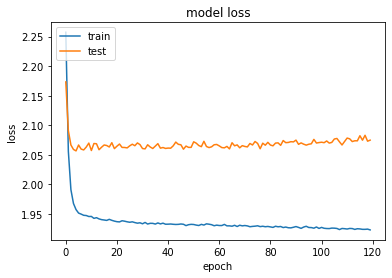

In [14]:
# summarize history for accuracy
plt.plot(model_chroma_stft.history['accuracy'])
plt.plot(model_chroma_stft.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_chroma_stft.history['loss'])
plt.plot(model_chroma_stft.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
train_hist = pd.DataFrame(model_chroma_stft.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.257194,0.191820,2.173244,0.153083
1,2.056010,0.215159,2.090902,0.170801
2,1.991240,0.231385,2.066672,0.184030
3,1.967907,0.236719,2.059192,0.193244
4,1.957580,0.241165,2.056735,0.201512
...,...,...,...,...
115,1.924901,0.253834,2.082375,0.190645
116,1.924212,0.247388,2.074793,0.192771
117,1.924200,0.250500,2.083089,0.187101
118,1.924585,0.253834,2.073111,0.199622


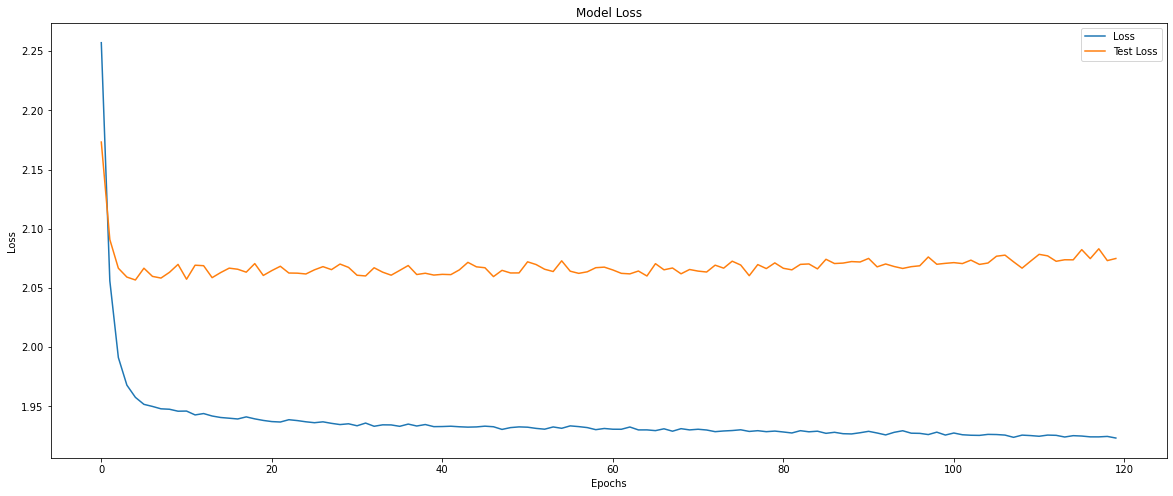

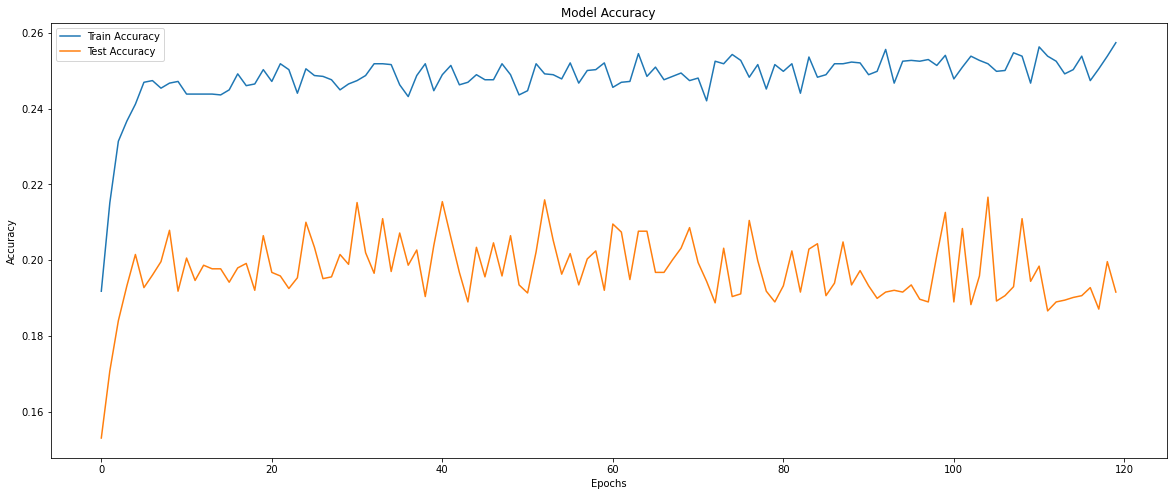

In [16]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [17]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[  0   0  84  51  59 131   5 120  44   6]
 [  0   0  23  43  10   3   0  11 105  26]
 [  0   0  94 133  74  20   0 105  42  32]
 [  0   0  89 123  63  20   0  72  92  41]
 [  0   0  83  43  77  37   3 221  25  11]
 [  0   0  39  77  92  55   9 184  11  16]
 [  0   0   1   3   4  42  23 105   3   3]
 [  0   0  50  28  70  67   8 210  13   6]
 [  0   0  34  69  43   7   0  26 187  27]
 [  0   0  61 160  20   5   0  24 188  42]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.00      0.00      0.00       221
           2       0.17      0.19      0.18       500
           3       0.17      0.25      0.20       500
           4       0.15      0.15      0.15       500
           5       0.14      0.11      0.13       483
           6       0.48      0.12      0.20       184
           7       0.19      0.46      0.27       452
           8       0.26      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta